## **Face Expression Recognition (FER) Challenge - Using Convolution Neural Networks**
## **Steps**:
  1. Data preprocessing, exploration & transformation
  2. Creating the CNN model
  3. Training the CNN model
  4. Testing the CNN model

## **1. Data preprocessing, exploration & transformation**

### 1.1. Importing needed dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

### 1.2. Download needed dataset into colab

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge
!unzip facial-expression-recognitionferchallenge.zip

 96% 93.0M/96.6M [00:05<00:00, 14.9MB/s]
100% 96.6M/96.6M [00:05<00:00, 19.4MB/s]
Archive:  facial-expression-recognitionferchallenge.zip
  inflating: Submission.csv          
  inflating: fer2013/fer2013/README  
  inflating: fer2013/fer2013/fer2013.bib  
  inflating: fer2013/fer2013/fer2013.csv  


### 1.3. Import needed dataset

In [ ]:
df = pd.read_csv('/content/fer2013/fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


### 1.4. Checking for missing values

In [ ]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

### 1.5. Data exploration

In [ ]:
# Checking shape of data

df.shape

(35887, 3)

In [ ]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
# count of dependent variable

df['emotion'].unique(), df['emotion'].nunique()

(array([0, 2, 4, 6, 3, 5, 1]), 7)

In [ ]:
# Distribution of data

df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

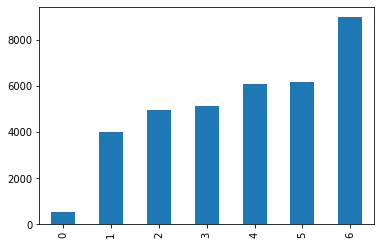

In [ ]:
# Emotion categories : 0-Angry, 1-Disgust, 2-Fear, 3-Happy, 4-Sad, 5-Surprise, 6- Neutral

df['emotion'].value_counts().sort_values(ignore_index=True).plot.bar()

### 1.6. Splitting train & test set

In [ ]:
df_trainset = df[df['Usage']=='Training']
df_publictestset = df[df['Usage']=='PrivateTest']
df_privatetestset = df[df['Usage']=='PublicTest']

In [ ]:
# value counts in train and test set

print(df_trainset['Usage'].value_counts())
print(df_publictestset['Usage'].value_counts())
print(df_privatetestset['Usage'].value_counts())

Training    28709
Name: Usage, dtype: int64
PrivateTest    3589
Name: Usage, dtype: int64
PublicTest    3589
Name: Usage, dtype: int64


In [ ]:
# since we doesn't need usage column we are dropping it.

df_trainset = df_trainset.drop(columns=['Usage'])
df_publictestset = df_publictestset.drop(columns=['Usage'])
df_privatetestset = df_privatetestset.drop(columns=['Usage'])

In [ ]:
df_trainset.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


### 1.7. Train and test split

In [ ]:
(X_train, X_test, y_train, y_test) = ([], [], [], [])

In [ ]:
# Split dependent and independent variable

for index,values in df_trainset.iterrows():
  X_train.append(list(map(int, values['pixels'].split(' '))))
  y_train.append(values['emotion'])

for index,values in df_publictestset.iterrows():
  X_test.append(list(map(int, values['pixels'].split(' '))))
  y_test.append(values['emotion'])

In [ ]:
# since cnn model requires numpy array as input we need to convert to that format

X_train = np.array(X_train,'float32')
y_train = np.array(y_train,'float32')

X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

In [ ]:
X_train.shape, X_test.shape

((28709, 2304), (3589, 2304))

### 1.8. Variable encoding

In [ ]:
# categorical encoding for output variable

y_train = np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)

### 1.9. Data normalization

In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

### 1.10. Reshaping data

In [ ]:
# we have to do reshape for neural networks

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
X_train.shape, X_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

## **2. Creating the CNN model**

### 2.1. Initializing CNN

In [ ]:
cnn = Sequential(name='cnn_model')

### 2.2. First convolution & pooling layer

In [ ]:
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), name='conv2d_1'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2), name='maxpool2d_1'))
cnn.add(Dropout(0.5, name='dropout_1'))

### 2.3. Second convolution & pooling layer

In [ ]:
cnn.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2), name='maxpool2d_2'))
cnn.add(Dropout(0.5, name='dropout_2'))

### 2.4. Third convolution & pooling layer

In [ ]:
cnn.add(Conv2D(128, (3, 3), activation='relu', name='conv2d_3'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2), name='maxpool2d_3'))
cnn.add(Dropout(0.5, name='dropout_3'))

### 2.5. Flattening

In [ ]:
cnn.add(Flatten(name='flatten'))

### 2.6. Fully connected layer

In [ ]:
cnn.add(Dense(1024, activation='relu', name='dense_1'))
cnn.add(Dropout(0.2, name='dropout_4'))

In [ ]:
cnn.add(Dense(1024, activation='relu', name='dense_2'))
cnn.add(Dropout(0.2, name='dropout_5'))

### 2.7. Output layer

In [ ]:
cnn.add(Dense(7, activation='softmax', name='op_layer'))
cnn.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
maxpool2d_2 (MaxPooling2D)   (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73

## **3. Training the CNN model**

### 3.1. Compiling the cnn

In [ ]:
cnn.compile(loss=categorical_crossentropy, 
            optimizer=Adam(), 
            metrics=['accuracy'])

### 3.2. Training cnn model on train set

In [ ]:
history = cnn.fit(X_train, y_train, 
          batch_size=64, 
          epochs=200, 
          verbose=1, 
          validation_data=(X_test, y_test), 
          shuffle=True)

Epoch 1/200
449/449 [==============================] - 13s 15ms/step - loss: 1.7644 - accuracy: 0.2796 - val_loss: 1.5375 - val_accuracy: 0.4079
Epoch 2/200
449/449 [==============================] - 6s 14ms/step - loss: 1.5328 - accuracy: 0.3991 - val_loss: 1.4326 - val_accuracy: 0.4483
Epoch 3/200
449/449 [==============================] - 6s 14ms/step - loss: 1.4493 - accuracy: 0.4351 - val_loss: 1.3792 - val_accuracy: 0.4759
Epoch 4/200
449/449 [==============================] - 6s 14ms/step - loss: 1.4094 - accuracy: 0.4590 - val_loss: 1.2836 - val_accuracy: 0.5057
Epoch 5/200
449/449 [==============================] - 6s 14ms/step - loss: 1.3494 - accuracy: 0.4826 - val_loss: 1.2596 - val_accuracy: 0.5093
Epoch 6/200
449/449 [==============================] - 6s 14ms/step - loss: 1.3160 - accuracy: 0.4958 - val_loss: 1.2083 - val_accuracy: 0.5364
Epoch 7/200
449/449 [==============================] - 6s 14ms/step - loss: 1.2994 - accuracy: 0.5001 - val_loss: 1.1930 - val_accuracy

### 3.3. Visualizing cnn model accuracy & loss

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

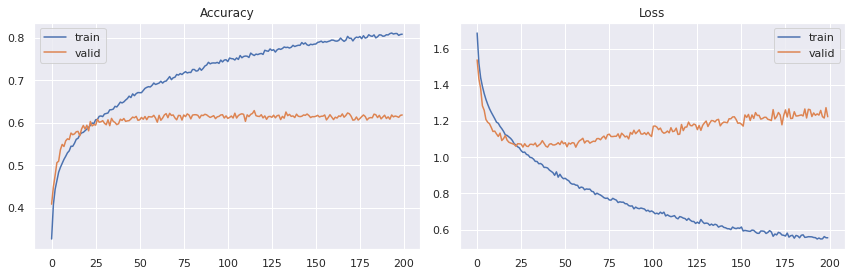

In [ ]:
import seaborn as sns
from matplotlib import pyplot

sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

#pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

## **4. Testing the CNN model**

### 4.1. Preprocessing test set

In [ ]:
(Xp_test, yp_test) = ([], [])

for index,values in df_privatetestset.iterrows():
  Xp_test.append(list(map(int, values['pixels'].split(' '))))
  yp_test.append(values['emotion'])

Xp_test = np.array(Xp_test,'float32')
# yp_test = np.array(yp_test,'float32')

Xp_test -= np.mean(Xp_test, axis=0)
Xp_test /= np.std(Xp_test, axis=0)

# yp_test = np_utils.to_categorical(ypp_test, num_classes=7)

Xp_test = Xp_test.reshape(Xp_test.shape[0], 48, 48, 1)

### 4.2. Evaluating cnn model on test set (private test set)

In [ ]:
yp_pred = cnn.predict(Xp_test)

In [ ]:
out = []

emotions = (0, 1, 2, 3, 4, 5, 6)
for i in range(len(yp_pred)):
  max_index = np.argmax(yp_pred[i])
  out.append(emotions[max_index])

### 4.3. Visualizing test set result

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yp_test, out))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49       467
           1       0.94      0.54      0.68        56
           2       0.53      0.40      0.45       496
           3       0.80      0.79      0.79       895
           4       0.47      0.54      0.50       653
           5       0.81      0.73      0.77       415
           6       0.48      0.55      0.52       607

    accuracy                           0.60      3589
   macro avg       0.64      0.58      0.60      3589
weighted avg       0.61      0.60      0.60      3589



In [ ]:
pip install scikit-plot

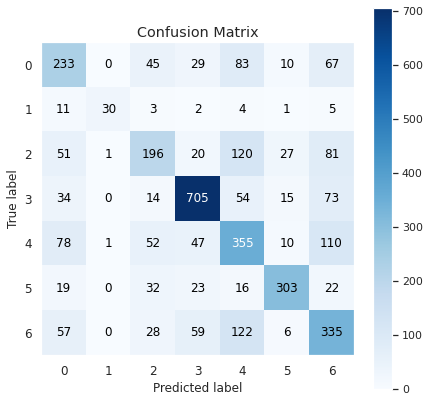

In [ ]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(yp_test, out, figsize=(7,7))

## **5. Saving the CNN model for later use**

In [ ]:
# using this we can save the trained model for later use.
fer_json = cnn.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
cnn.save_weights("fer.h5")